In [1]:
"""" 
test plot GFS data (which is used to force RTOFS) under smb://mule/disk3/projects/tc2022/
named like:
    /mule/tc2022/GFS/sfc/[YYYYMMDD]/reg
    /mule/tc2022/tc2023/GFS/sfc/[YYYYMMDD]/reg/
    /mule/tc2022/tc2024/GFS/sfc/[YYYYMMDD]/reg/
with names like gfs.20230916.t00z.sfcf001.nc, where, in this case, 
t00z signifies the 0z forcast cycle and sfcf001 means that this data from forecast hour 1. 

Can aggregate these files to produce hourly momentum flux and surface ocean current data that offers
a chance to evaluate wind work on currents at the GFS and RTOFS horizontal scales 
(~ 12km for GFS/ 0.117 deg)
"""
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys

In [3]:
datestr = '20230907'
path = '/Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/'+datestr+'/reg/'
filenames_all = np.sort( os.listdir(path) )
filenames = np.array([])
for file in filenames_all:
    if '.nc' in file:
        filenames = np.append(filenames, file)
print(len(filenames), filenames)

48 ['gfs.20230907.t00z.sfcf001.nc' 'gfs.20230907.t00z.sfcf002.nc'
 'gfs.20230907.t00z.sfcf003.nc' 'gfs.20230907.t00z.sfcf004.nc'
 'gfs.20230907.t00z.sfcf005.nc' 'gfs.20230907.t00z.sfcf006.nc'
 'gfs.20230907.t00z.sfcf007.nc' 'gfs.20230907.t00z.sfcf008.nc'
 'gfs.20230907.t00z.sfcf009.nc' 'gfs.20230907.t00z.sfcf010.nc'
 'gfs.20230907.t00z.sfcf011.nc' 'gfs.20230907.t00z.sfcf012.nc'
 'gfs.20230907.t06z.sfcf001.nc' 'gfs.20230907.t06z.sfcf002.nc'
 'gfs.20230907.t06z.sfcf003.nc' 'gfs.20230907.t06z.sfcf004.nc'
 'gfs.20230907.t06z.sfcf005.nc' 'gfs.20230907.t06z.sfcf006.nc'
 'gfs.20230907.t06z.sfcf007.nc' 'gfs.20230907.t06z.sfcf008.nc'
 'gfs.20230907.t06z.sfcf009.nc' 'gfs.20230907.t06z.sfcf010.nc'
 'gfs.20230907.t06z.sfcf011.nc' 'gfs.20230907.t06z.sfcf012.nc'
 'gfs.20230907.t12z.sfcf001.nc' 'gfs.20230907.t12z.sfcf002.nc'
 'gfs.20230907.t12z.sfcf003.nc' 'gfs.20230907.t12z.sfcf004.nc'
 'gfs.20230907.t12z.sfcf005.nc' 'gfs.20230907.t12z.sfcf006.nc'
 'gfs.20230907.t12z.sfcf007.nc' 'gfs.20230907.t12z.s

In [6]:
'Read GFS data'
ds = nc.Dataset(path+filenames[0])
# print(ds)
str_vars = ['UGRD10M','VGRD10M']# ['TIME','LON','LAT','UFLX_AVE','VFLX_AVE']
""" 
    TIME:units = "hours since 2023-09-07 00:00:00" ;
    UFLX_AVE:units = "N/m**2" ;
"""
for str_var_i in str_vars:
    temp = ds.variables[str_var_i][:]
    str_exec = str_var_i+'= temp'
    exec(str_exec)
dtime = np.array([datetime.datetime.strptime(datestr,'%Y%m%d')+datetime.timedelta(hours=dt) for dt in TIME])
print(dtime[0:3],dtime[-1])
print('lon shape:',LON.shape, '. zonal momentum flux shape:',UFLX_AVE.shape)
print('min-max of lon/ lat:',np.min(LON),'-',np.max(LON),np.min(LAT),'-',np.max(LAT))
LON[LON>180] = LON[LON>180]-360
print('min-max of lon/ lat:',np.min(LON),'-',np.max(LON),np.min(LAT),'-',np.max(LAT))

[datetime.datetime(2023, 9, 7, 1, 0)] 2023-09-07 01:00:00
lon shape: (329, 615) . zonal momentum flux shape: (1, 329, 615)
min-max of lon/ lat: -101.953125 - -30.0 7.556133668527031 - 45.98112279618861
min-max of lon/ lat: -101.953125 - -30.0 7.556133668527031 - 45.98112279618861


In [5]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: PyFerret V7.3 (optimized)  7-Sep-23
    Conventions: CF-1.6
    dimensions(sizes): GRID_XT2203_2817(615), GRID_YT833_1161(329), bnds(2), TIME(1)
    variables(dimensions): float64 GRID_XT2203_2817(GRID_XT2203_2817), float64 GRID_YT833_1161(GRID_YT833_1161), float64 GRID_YT833_1161_bnds(GRID_YT833_1161, bnds), float64 LAT(GRID_YT833_1161, GRID_XT2203_2817), float64 LON(GRID_YT833_1161, GRID_XT2203_2817), float64 TIME(TIME), float32 DLWRF(TIME, GRID_YT833_1161, GRID_XT2203_2817), float32 DLWRF_AVE(TIME, GRID_YT833_1161, GRID_XT2203_2817), float32 DSWRF(TIME, GRID_YT833_1161, GRID_XT2203_2817), float32 DSWRF_AVE(TIME, GRID_YT833_1161, GRID_XT2203_2817), float32 FRICV(TIME, GRID_YT833_1161, GRID_XT2203_2817), float32 HPBL(TIME, GRID_YT833_1161, GRID_XT2203_2817), float32 LHTFL(TIME, GRID_YT833_1161, GRID_XT2203_2817), float32 LHTFL_AVE(TIME, GRID_YT833_1161, GRID_XT2203_2817), floa

In [7]:
### load topography data
path_topo = '/Users/chi/Documents/Data/Topography/GEBCO_24_Jul_2024/'
ds_topo = nc.Dataset(path_topo+'gebco_2024_n35.0_s5.0_w-92.0_e-50.0.nc')
# print(ds_topo)
lon_topo = ds_topo.variables['lon'][:]
lat_topo = ds_topo.variables['lat'][:]
elevation = ds_topo.variables['elevation'][:]
print(lon_topo.shape, lat_topo.shape, elevation.shape )
ilon = np.where( (lon_topo>= np.min(LON)) & (lon_topo<= np.max(LON)) )[0]
ilat = np.where( (lat_topo>= np.min(LAT)) & (lat_topo<= np.max(LAT)) )[0]
print(lon_topo[ilon].shape, lat_topo[ilat].shape, elevation[np.ix_(ilat,ilon)].shape )

(10080,) (7200,) (7200, 10080)
(10080,) (6587,) (6587, 10080)


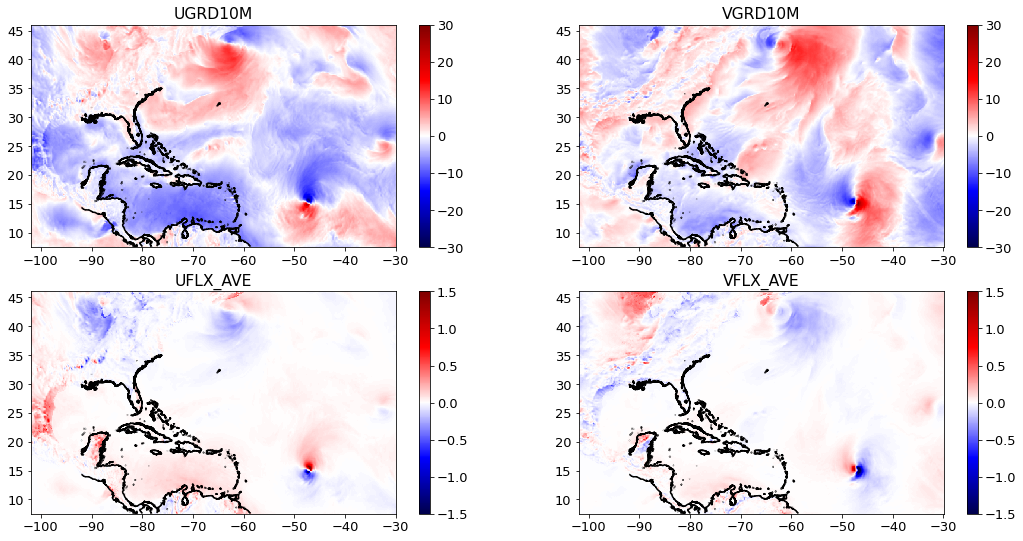

In [ ]:
### check if momentum flux is postive upward into the atmosphere. --> YES
str_vars_plot = ['UGRD10M','VGRD10M','UFLX_AVE','VFLX_AVE']
vars_lim = [[-30,30],[-30,30],[-1.5,1.5],[-1.5,1.5]]
plt.clf()
plt.gcf().set_size_inches(18, 9)
plt.rcParams.update({'font.size': 13})
for i, str_var_i in enumerate( str_vars_plot ):
    plt.subplot(2,2,i+1)
    plt.pcolormesh(LON,LAT,np.squeeze(eval(str_var_i)),cmap='seismic',vmin=vars_lim[i][0],vmax=vars_lim[i][1])
    plt.colorbar()
    plt.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)],colors='k',levels=0)
    plt.title(str_var_i)

0.1171875


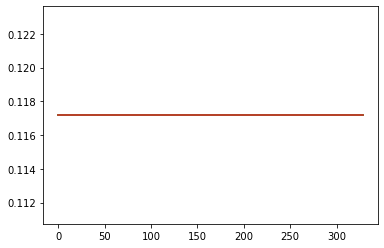

In [20]:
plt.plot(np.diff(LON));
print(np.mean(np.diff(LON)))